In [24]:
from langgraph.graph import StateGraph,START,END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict, Annotated, Literal
from pydantic import BaseModel, Field
import operator


In [25]:
class QuadState(TypedDict):
    a:int
    b:int
    c:int
    equation:str
    discriminant:float
    result:str

In [26]:
def show_equation(state:QuadState):
    eqn = f"{state['a']}x^2+{state['b']}x+{state['c']} = 0"
    return {"equation":eqn}

In [27]:
def calculate_discriminant(state:QuadState):
    discriminant = state['b']**2 - 4*state['a']*state['c']
    return {"discriminant":discriminant}

In [28]:
def real_roots(state:QuadState):
    root1 = (-state['b'] + state['discriminant']**0.5)/(2*state['a'])
    root2 = (-state['b'] - state['discriminant']**0.5)/(2*state['a'])
    return {'result':f'The roots are {root1} and {root2}.'}

In [29]:
def repeated_roots(state:QuadState):
    root = -state['b']/(2*state['a'])
    return {'result':f'The roots are {root} and {root}.'}

In [30]:
def no_real_roots(state:QuadState):
    return {'result':'No real roots exist.'}

In [31]:
def check_condition(state:QuadState) -> Literal["real_roots","repeated_roots","no_real_roots"]:
    if state['discriminant'] > 0:
        return "real_roots"
    elif state['discriminant'] == 0:
        return "repeated_roots"
    else:
        return "no_real_roots"

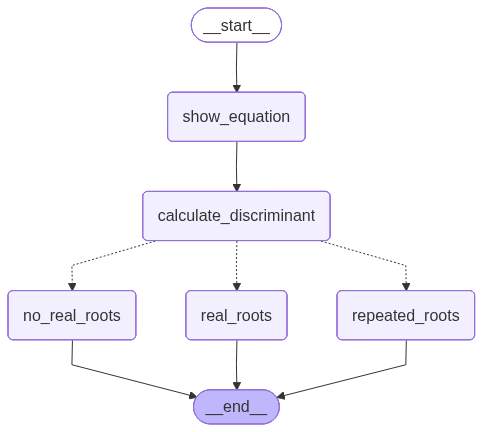

In [32]:
graph = StateGraph(QuadState)

graph.add_node('show_equation',show_equation)
graph.add_node('calculate_discriminant',calculate_discriminant)
graph.add_node('real_roots',real_roots)
graph.add_node('no_real_roots',no_real_roots)
graph.add_node('repeated_roots',repeated_roots)

#add edge between nodes
graph.add_edge(START,'show_equation')
graph.add_edge('show_equation','calculate_discriminant')
graph.add_conditional_edges('calculate_discriminant',check_condition)
graph.add_edge('real_roots',END)
graph.add_edge('no_real_roots',END)
graph.add_edge('repeated_roots',END)

workflow = graph.compile()
workflow


In [33]:
initial_state = {
    'a': 1,
    'b': 2,
    'c': 3
}
final_state = workflow.invoke(initial_state)
print(final_state)

{'a': 1, 'b': 2, 'c': 3, 'equation': '1x^2+2x+3 = 0', 'discriminant': -8, 'result': 'No real roots exist.'}
